In [101]:
import scipy as sp
import numpy as np
import imageio.v3 as iio
import matplotlib.pyplot as plt

# Mostrar la imagen y sus propiedades

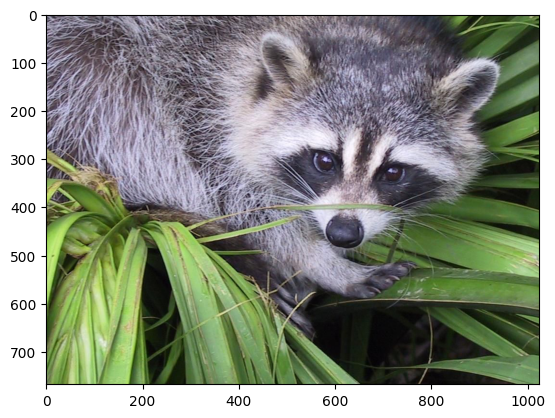

In [102]:
f = sp.datasets.face() # Cargamos la imagen Face de scipy
iio.imwrite("face.png", f) # Guardamos la imagen en un archivo
plt.imshow(f) # Mostramos la imagen
plt.show()


## Propiedades de la imagen

In [103]:
face = iio.imread('face.png') # Asignamos una variable a la imagen
type(face) # Imprimimos su tipo de dato

numpy.ndarray

In [104]:
face.shape, face.dtype # Pixeles de alto, ancho y "profundidad de color"

((768, 1024, 3), dtype('uint8'))

# Mapas de colores, contornos y contrastes

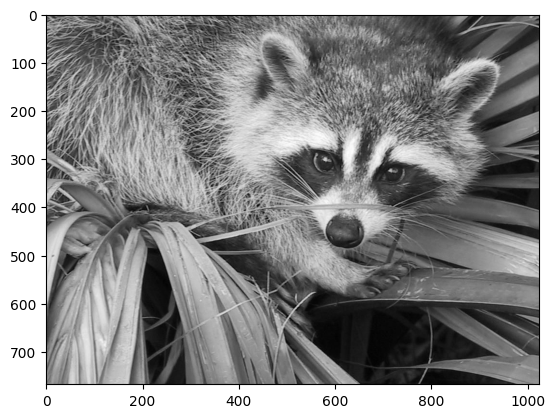

In [105]:
f = sp.datasets.face(gray=True) # Obtenemos la misma imagen en escala de grises
plt.imshow(f, cmap=plt.cm.gray) # Mostramos la imagen especificando el mapa de colores

In [106]:
f.shape, f.dtype # Traer la imagen en escala de grises elimina la "profundidad de color"

((768, 1024), dtype('uint8'))

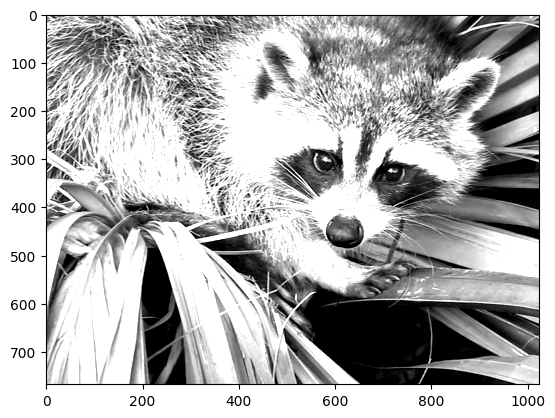

In [107]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=150) 
#Aumentamos el contraste haciendo que el valor minimo sea 30(Todo lo que este por debajo se convierte en 30)
#y el maximo 150(Todo lo que este por encima se convierte en 150)

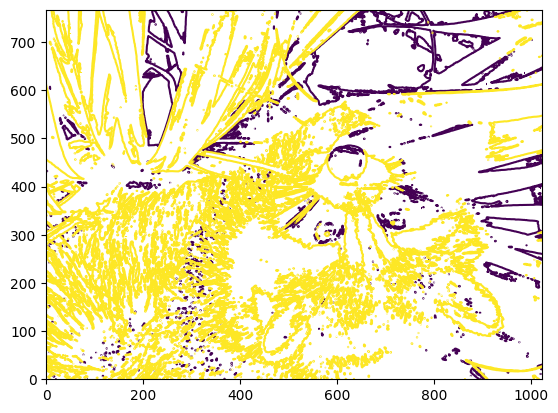

In [108]:
plt.contour(f, [30, 150]) #Se supone que deberia de dibujar las lineas de contorno de la imagen original pero no se porque tambien la invierte

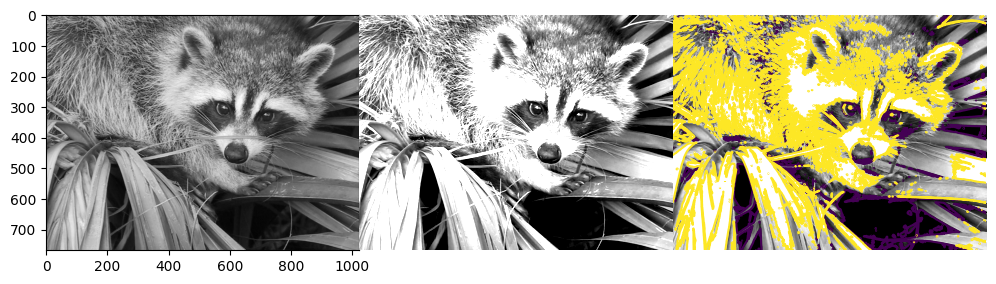

In [109]:
plt.figure(figsize=(10, 3.6))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray) # Mostramos la imagen en escala de grises

plt.subplot(132)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=150) # Mostramos la imagen con un contraste aumentado
plt.axis("off")

plt.subplot(133)
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=150) 
plt.contour(f, [30, 150]) # Dibujamos las lineas de contorno sobre la imagen con contrastes aumentados
plt.axis("off")

plt.subplots_adjust(wspace=0, hspace=0.0, top=0.99, bottom=0.01, left=0.05, right=0.99) #Eliminamos el espacio entre imagenes y ajustamos los margenes

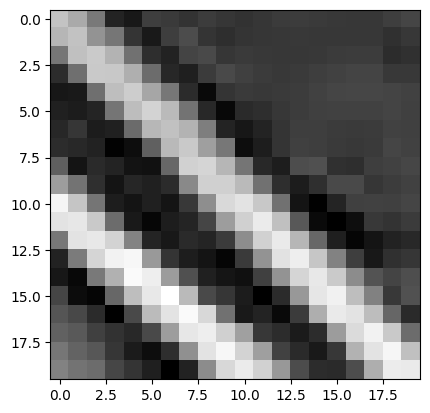

In [110]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray) #Hace un zoom en la imagen

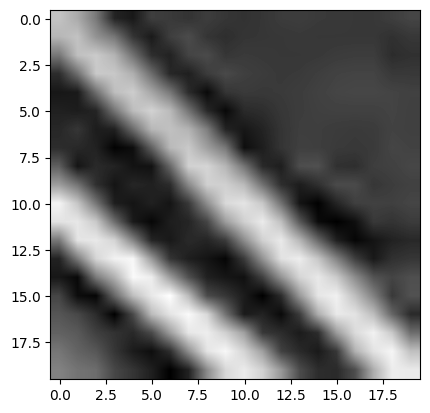

In [111]:
plt.imshow(f[320:340, 510:530], cmap=plt.cm.gray, interpolation='bilinear') #Mostramos el zoom utilizando interpolacion bilineal para suavizar la imagen

# Operaciones basicas

## Informacion de pixeles

In [112]:
face = sp.datasets.face(gray=True)
face[0, 40] #Obtenemos el valor del pixel en la posicion 0,40

127

In [113]:
face[10:13, 20:23] #Obtenemos los valores de los pixeles en el rango de 10 a 13 y 20 a 23

array([[141, 153, 145],
       [133, 134, 125],
       [ 96,  92,  94]], dtype=uint8)

## Slice

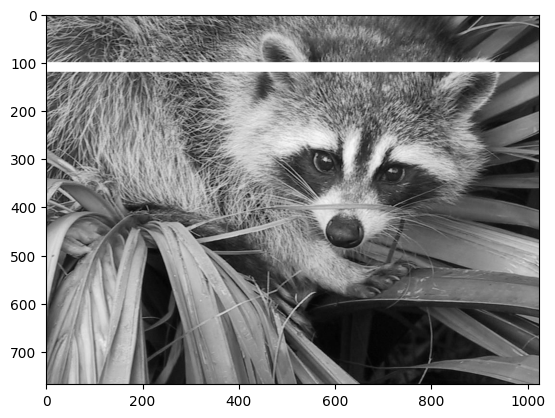

In [114]:
face[100:120] = 255 #Cambiamos los valores de los pixeles en el rango de 100 a 120 a 255 para que sean blancos
plt.imshow(face, cmap=plt.cm.gray) 

## Mascaras

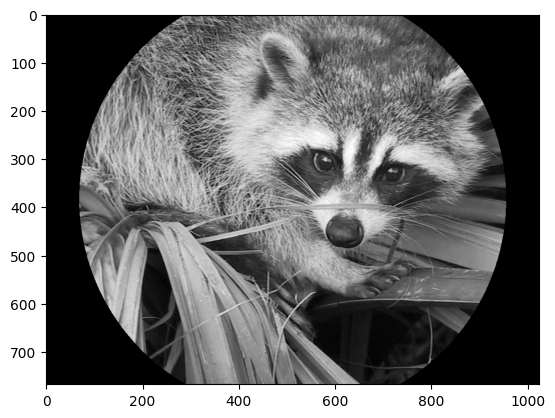

In [115]:
face = sp.datasets.face(gray=True) #Restauramos la imagen
lx, ly = face.shape #Obtenemos los limites de la imagen
X, Y = np.ogrid[0:lx, 0:ly] #Creamos una malla de pixeles
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 4 #Esto no se que hace
face[mask] = 0 #Convierte los pixeles que cumplan la condicion en 0
plt.imshow(face, cmap=plt.cm.gray) 

## Fancy indexing

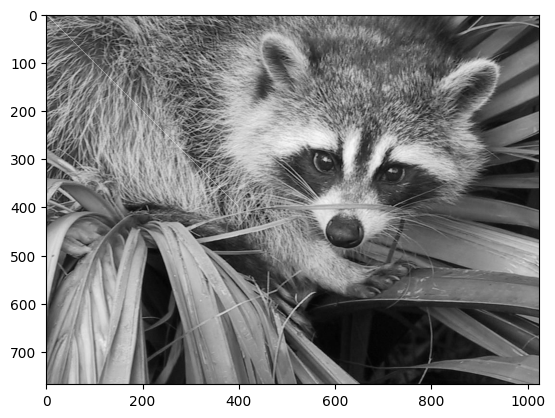

In [116]:
face = sp.datasets.face(gray=True) #Restauramos la imagen
face[range(400), range(400)] = 255 #Dibuja una linea blanca sobre la diagonal principal en la imagen hasta el pixel 400,400
plt.imshow(face, cmap=plt.cm.gray) 

## Informacion estadistica

In [117]:
face = sp.datasets.face(gray=True) 
face.mean() # Valor promedio de los pixeles en escalas de grises

113.48026784261067

In [118]:
face.max(), face.min() #Valor maximo y minimo en la imagen

(250, 0)

## Transformaciones Geometricas

### Recorte

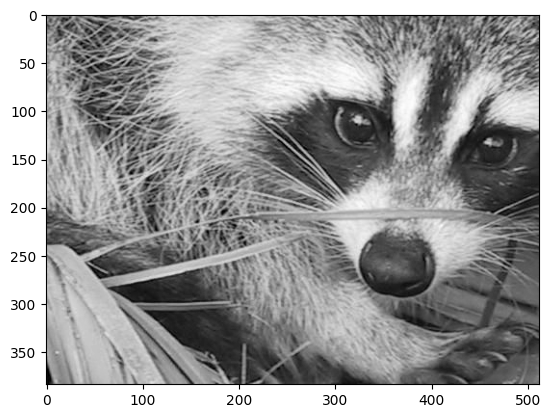

In [119]:
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4] #Limites del recorte
plt.imshow(crop_face, cmap=plt.cm.gray) 

### Invertir con respecto a la horizontal

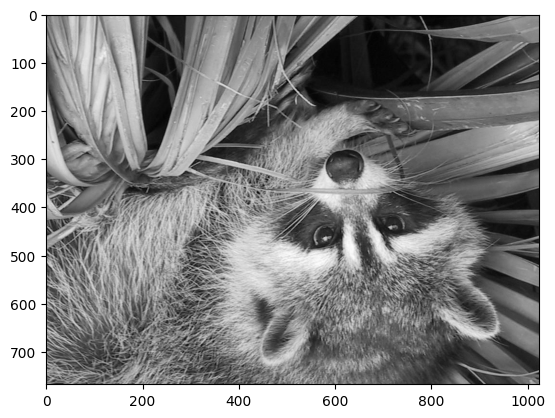

In [120]:
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face, cmap=plt.cm.gray)

### Rotaciones

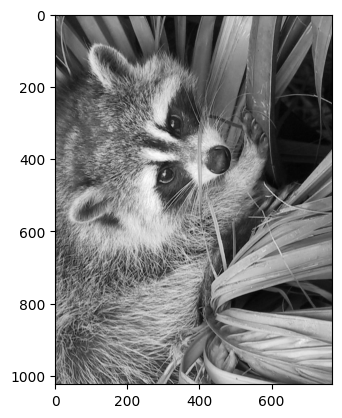

In [121]:
rotate_face = sp.ndimage.rotate(face, 90) #Rotamos la imagen 90 grados y actualiza los limites de la imagen
plt.imshow(rotate_face, cmap=plt.cm.gray)

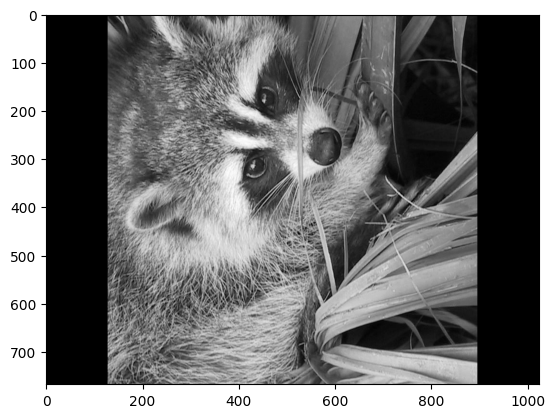

In [122]:
rotate_face_noreshape = sp.ndimage.rotate(face, 90, reshape=False) #Rotamos la imagen 90 grados sin actualizar los limites de la imagen
plt.imshow(rotate_face_noreshape, cmap=plt.cm.gray)

# Filtros

## Gaussiano

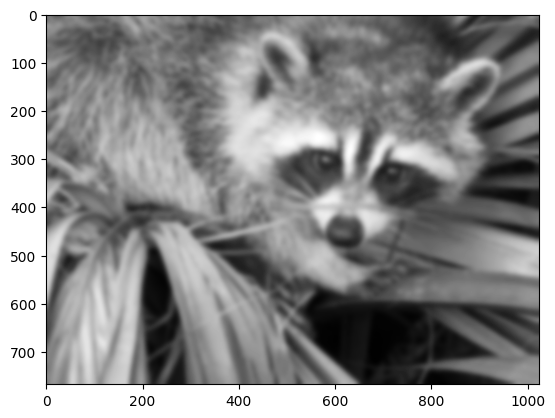

In [123]:
blurred_face = sp.ndimage.gaussian_filter(face, sigma=5) #Desenfoca la imagen dependiendo del valor del sigma
plt.imshow(blurred_face, cmap=plt.cm.gray)

## Uniforme

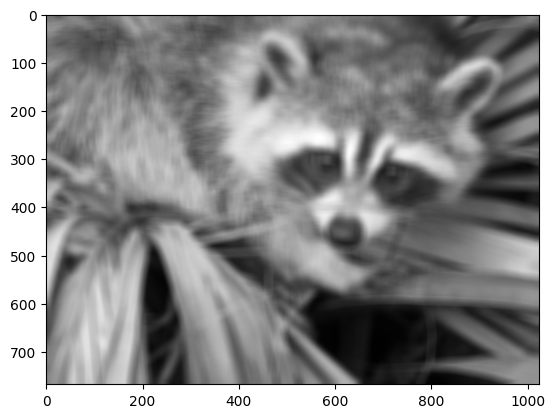

In [124]:
local_mean = sp.ndimage.uniform_filter(face, size=20) #Desenfoca la imagen dependiendo del valor del "size" (Probablemente la matematica detras de ambos filtros sea diferente?)
plt.imshow(local_mean, cmap=plt.cm.gray)

## Sharpening 

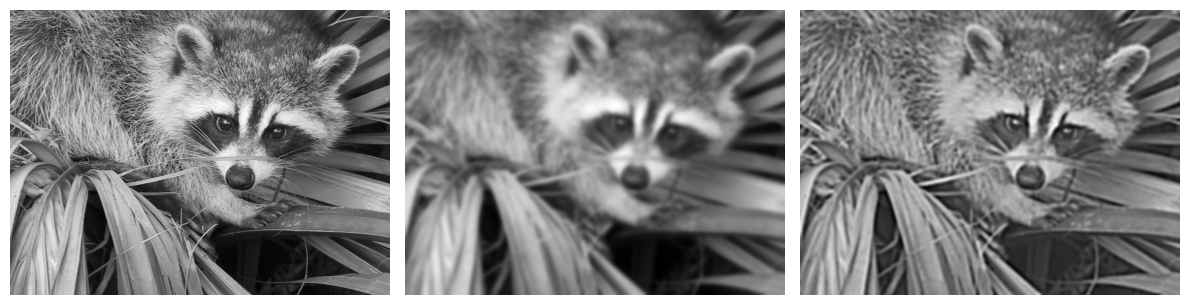

In [125]:
f = sp.datasets.face(gray=True).astype(float)
blurred_f = sp.ndimage.gaussian_filter(f, 5)

filter_blurred_f = sp.ndimage.gaussian_filter(blurred_f, 1)

alpha = 100
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f) # Buscar que es una aproximacion de laplace

plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(f, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis("off")
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis("off")

plt.tight_layout() #En resumen intenta mejorar una imagen la calidad  despues de un filtro gaussiano 


## Denoising

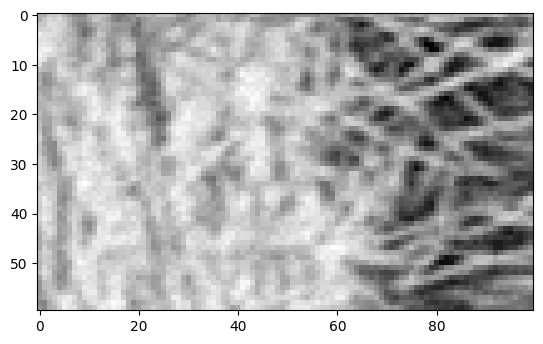

In [129]:
f = face[230:290, 220:320] #Zoom original sin ruido
plt.imshow(f, cmap=plt.cm.gray)

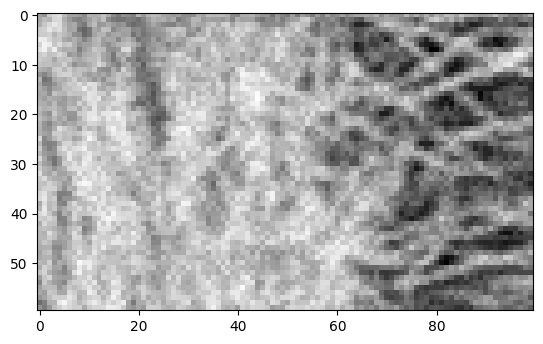

In [164]:
rng = np.random.default_rng() #Generador de numeros aleatorios
noisy = f +  f.std() * rng.random(f.shape) #.std es la desviacion estandar 
plt.imshow(noisy, cmap=plt.cm.gray)

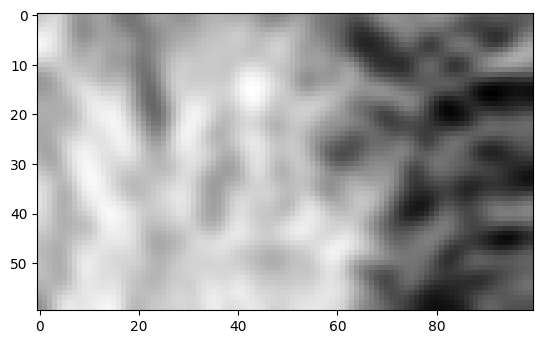

In [165]:
gauss_denoised = sp.ndimage.gaussian_filter(noisy, 2) #Desenfoca la imagen para eliminar el ruido pero tambien se pierde calidad de la imagen
plt.imshow(gauss_denoised, cmap=plt.cm.gray)

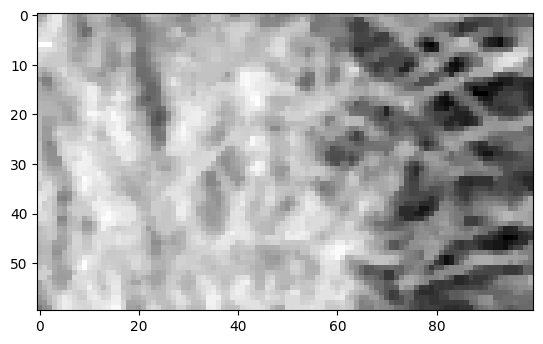

In [167]:
med_denoised = sp.ndimage.median_filter(noisy, 3) #Elimina el ruido, se pierde calidad de la imagen pero respeta un poco mas los bordes
plt.imshow(med_denoised, cmap=plt.cm.gray)

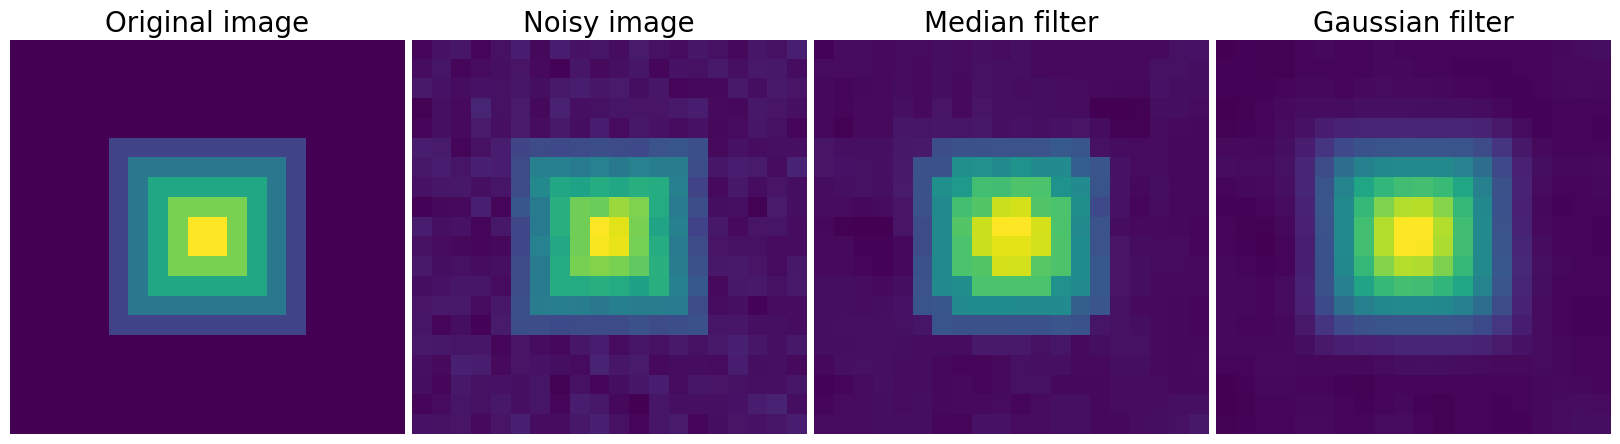

In [186]:
rng = np.random.default_rng()

im = np.zeros((20, 20)) # Se crea la imagen vacia
im[5:-5, 5:-5] = 1 # Se dibuja un cuadrado en la imagen
im = sp.ndimage.distance_transform_bf(im) #Se aplica una transformacion de distancia sobre el cuadrado
im_noise = im + 0.1 * rng.normal(size=im.shape)

im_med = sp.ndimage.median_filter(im_noise, 3)
im_gauss = sp.ndimage.gaussian_filter(im_noise, 1)

plt.figure(figsize=(16, 5))

plt.subplot(141)
plt.imshow(im, interpolation="nearest")
plt.axis("off")
plt.title("Original image", fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation="nearest")
plt.axis("off")
plt.title("Noisy image", fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation="nearest")
plt.axis("off")
plt.title("Median filter", fontsize=20)
plt.subplot(144)
plt.imshow(im_gauss, interpolation="nearest")
plt.axis("off")
plt.title("Gaussian filter", fontsize=20)

#Se aprecia mejor lo que hace cada filtro con la imagen generada

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0, right=1)

plt.show()